In [1]:
import helper
import numpy as np
import os
import matplotlib.pyplot as plt

/Users/csengepetak/Documents/GitHub/CA_GRN2/helper.py:156: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = windows.dot(grn)
/Users/csengepetak/Documents/GitHub/CA_GRN2/helper.py:177: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = gene_vals.dot(internal_grn)


In [2]:
pop_size = 20
grn_size=22
dev_steps = 22
num_cells = 22
geneid=1
try_seedints = [69904,149796]

rule = 30

all_targs=[]
for s in try_seedints:
    random_grns=np.random.randn(5, grn_size+2, grn_size).astype(np.float64)
    #targets, phenos, fitnesses = helper.get_pop_TPF(random_grns, len(random_grns), num_cells, grn_size, dev_steps, geneid, r, s)
    start_pattern = helper.seedID2string(s, num_cells)
    start_expression = helper.seed2expression(start_pattern, pop_size, num_cells, grn_size, geneid)
    targets = helper.rule2targets_wrapped_wstart(int(rule), L=dev_steps+1, N=num_cells, start_pattern=start_pattern)
    all_targs.append(targets)

pop = np.random.randn(pop_size, grn_size+2, grn_size).astype(np.float64)
target1, _, fitnesses1 = helper.get_pop_TPF(pop, len(pop), num_cells, grn_size, dev_steps, geneid, rule, try_seedints[0])
target2, _, fitnesses2 = helper.get_pop_TPF(pop, len(pop), num_cells, grn_size, dev_steps, geneid, rule, try_seedints[1])



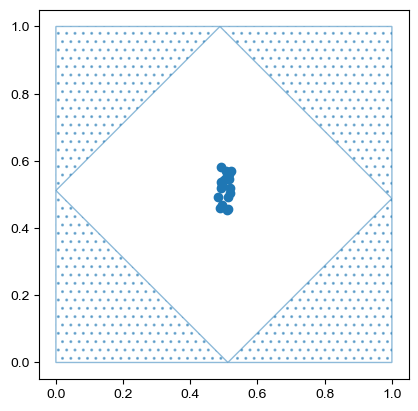

In [3]:
landmarks=helper.make_restricted_plot(all_targs, num_cells, dev_steps, fitnesses1, fitnesses2, labelled=False)

In [4]:
root="results_testing_saving/"
seed_ints = ["69904-149796","69904","149796"]
season_lens=[300,20_000,20_000]
rule = 30
rules = [f"{rule}-{rule}", rule, rule]
num_repeats = 2
pop_size = 1000

all_fits = []
for g in range(len(season_lens)):
    fits=[np.loadtxt(os.path.expanduser(root+f"stats_{season_lens[g]}_{rules[g]}_{seed_ints[g]}_{i+1}_both_fits.txt")) for i in range(num_repeats)]
    fits = np.array(fits)
    num_gens = int(fits.shape[1]/2/pop_size)
    fits = fits.reshape(num_repeats, num_gens, 2, pop_size)
    all_fits.append(fits)
all_fits=np.vstack(all_fits)
all_fits=np.reshape(all_fits, (3, num_repeats, num_gens, 2, pop_size ))
all_fits.shape

(3, 2, 2000, 2, 1000)

1999


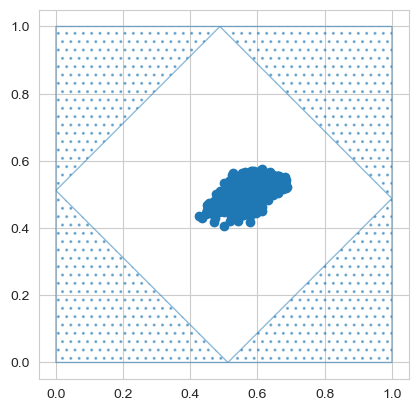

In [5]:
#NOTE: for static envs, fitnesses 1 is always the env they were evaluated on 
# (as opposed to fitnesses 2 being the relevant one when testing environment 1)

repid=1
a=list(range(2000))
check_freq=300
int_gens=a[check_freq-1::check_freq]

int_gens=[1999]

for i in int_gens:
    print(i)
    fitnesses1=all_fits[0][repid][i][0]
    fitnesses2=all_fits[0][repid][i][1]

    helper.make_restricted_plot(all_targs, num_cells, dev_steps, fitnesses1, fitnesses2, labelled=False)

#0.77429666 0.68433944 env 1
#0.67506982 0.73483343 env 2
#0.73658872 0.68701547

In [6]:
all_fits.shape

(3, 2, 2000, 2, 1000)

In [7]:
#GENERALISM
landmarks_list = np.array([landmarks.iloc[2][0],landmarks.iloc[2][1], landmarks.iloc[5][0],landmarks.iloc[5][1], landmarks.iloc[0][0],landmarks.iloc[0][1] ])
conz_BH = helper.calc_conz_BH(all_fits, landmarks_list)

/var/folders/41/13rhly317ygcfk0c_1jggxch0000gn/T/ipykernel_25778/3909559556.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  landmarks_list = np.array([landmarks.iloc[2][0],landmarks.iloc[2][1], landmarks.iloc[5][0],landmarks.iloc[5][1], landmarks.iloc[0][0],landmarks.iloc[0][1] ])


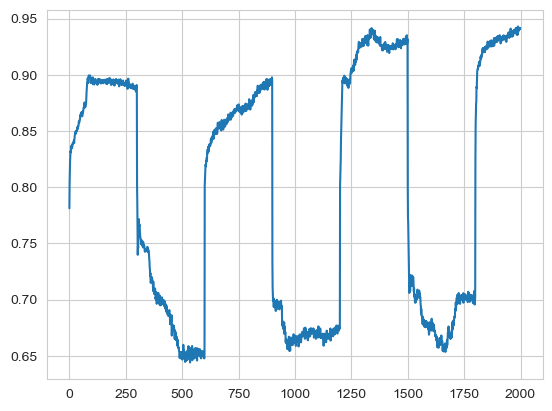

In [8]:
plt.plot(conz_BH[0,0,:]) #NOTE: can do the 3 line plots with this list too!

In [9]:
all_fits.shape

(3, 2, 2000, 2, 1000)

In [10]:
root="results_testing_saving/"
seed_ints = ["69904-149796","69904","149796"]
season_lens=[300,20_000,20_000]
rule = 30
rules = [f"{rule}-{rule}", rule, rule]
num_repeats = 2
pop_size = 1000


all_edges = []
for g in range(len(season_lens)):
    edges=[np.loadtxt(os.path.expanduser(root+f"stats_{season_lens[g]}_{rules[g]}_{seed_ints[g]}_{i+1}_edges.txt")) for i in range(num_repeats)]
    edges = np.array(edges).astype(int) 
    num_generations=int(edges.shape[1]/4/pop_size)
    print(edges.shape, num_generations)
    edges = edges.reshape(num_repeats, num_generations*pop_size, 2, 2)
    all_edges.append(edges)
all_edges=np.vstack(all_edges)
all_edges=np.reshape(all_edges, (3, num_repeats, num_generations*pop_size, 2, 2 ))
all_edges.shape

(2, 8000000) 2000
(2, 8000000) 2000
(2, 8000000) 2000


(3, 2, 2000000, 2, 2)

In [11]:
from tqdm import trange

kid_fits = np.zeros((3,num_repeats,num_generations-1,2, 100,10))
for e in range(3):
    for rep in range(num_repeats):
        for g in trange(num_generations-1): #last gen has kids but no fitnesses computed
            start = g*pop_size
            stop = g*pop_size + pop_size
            a = all_edges[e,rep,start:stop, :, :] #first generation, gen 0
            unique_first_positions, inverse_indices = np.unique(a[:, 0], axis=0, return_inverse=True)
            #print(unique_first_positions.shape) #100, parents
            #print(inverse_indices.shape) #1000, kids, including surviving parents
            b = np.array([a[:, 1][inverse_indices == i] for i in range(len(unique_first_positions))]) #for each parent, 10 kids, 2d id
            b = b[:,:,1] #only second id is interesting
            b_flattened = b.reshape(pop_size)
            b_fits = all_fits[e,rep,g+1,:,:][:,b_flattened] #have to be looking 1 gen down
            b_fits = b_fits.reshape(2, 100, 10) #the 2 fitness values, num parents, num kids
            #print(b_fits[1,3,5]) #fitness2 of the sixth kid of the fourth parent
            #print(all_fits[0,0,1,1,777]) #fitness2 of the 777th individual in the population in the second generation
            kid_fits[e,rep,g,:,:,:] = b_fits

100%|██████████| 1999/1999 [00:01<00:00, 1791.88it/s]


In [12]:
kid_fits.shape #experiment, rep, generation, 2 fits, 100 parents, 10 kids

(3, 2, 1999, 2, 100, 10)

In [15]:
div_BH = helper.calc_div_BH(kid_fits, landmarks)
div_BH.shape

(3, 2, 1999)

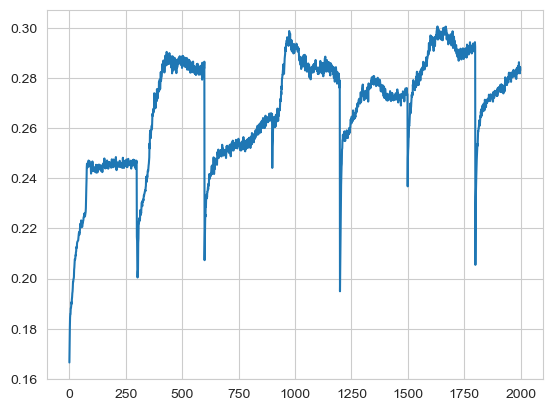

In [16]:
plt.plot(div_BH[0,0,:]) #NOTE: can do the 3 line plots with this list too!